In [124]:
import iris
import numpy as np
from matplotlib import pyplot as plt
import iris.quickplot as qplt
from PyCO2SYS import CO2SYS
from PyCO2SYS.api import CO2SYS_wrap as co2sys

Pa_to_uatm = ((1.0/0.9869e-1))

In [23]:
df1 = co2sys(dic=np.arange(2100, 2300, 5), alk=2400, pco2=None, fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=10, temp_out=10, pres_in=0, pres_out=0,
    sal=35, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


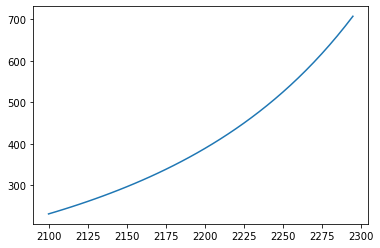

In [27]:
plt.plot(np.arange(2100, 2300, 5),df1.pCO2in)

In [29]:
df2 = co2sys(dic=None, alk=2400, pco2=np.arange(200,700,5), fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=10, temp_out=10, pres_in=0, pres_out=0,
    sal=35, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


In [40]:
df3 = co2sys(dic=None, alk=2400, pco2=np.arange(200,700,5), fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=10,sal=35, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


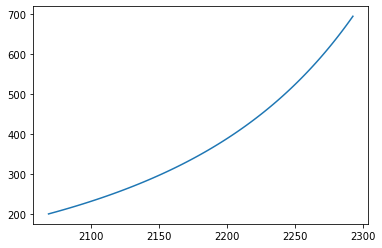

In [41]:
plt.plot(df3.TCO2,df3.pCO2in)

In [103]:
directory = '/Users/ph290/Downloads/'
file1 = directory+'test_thetao_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
file2 = directory+'test_so_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
file3 = directory+'test_dissic_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
file4 = directory+'test_talk_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
file5 = directory+'test_spco2_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'

c_thetao = iris.load_cube(file1)
c_so = iris.load_cube(file2)
c_dissic = iris.load_cube(file3)
c_talk = iris.load_cube(file4)
c_spco2 = iris.load_cube(file5)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users

In [126]:
c_thetao_data = c_thetao[0][0].data.data
c_thetao_data[np.where(c_thetao[0][0].data.mask)] = np.nan

c_so_data = c_so[0][0].data.data
c_so_data[np.where(c_so[0][0].data.mask)] = np.nan

c_dissic_data = c_dissic[0][0].data.data * 1.0e3
c_dissic_data[np.where(c_dissic[0][0].data.mask)] = np.nan

c_talk_data = c_talk[0][0].data.data * 1.0e3
c_talk_data[np.where(c_talk[0][0].data.mask)] = np.nan

c_spco2_data = c_spco2[0].data.data * Pa_to_uatm
c_spco2_data[np.where(c_spco2[0].data.mask)] = np.nan

df3 = co2sys(dic=c_dissic_data, alk=c_talk_data, pco2=None, fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=c_thetao_data,sal=c_so_data, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

pco2 = df3.pCO2in.values.reshape((330, 360))

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


In [115]:
1.0/0.9869e-5

101327.3887931908

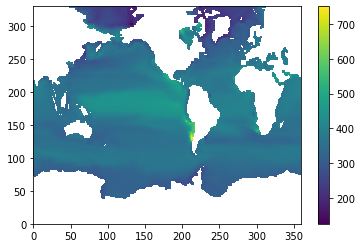

In [127]:
plt.pcolormesh(c_spco2_data)
plt.colorbar()

In [96]:
np.shape(c_dissic_data)

(330, 360)

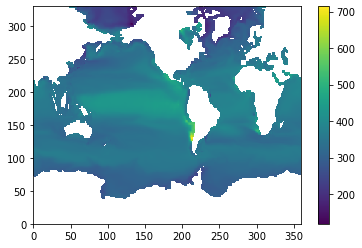

In [99]:
plt.pcolormesh(df3.pCO2in.values.reshape((330, 360)))
plt.colorbar()

In [113]:
help(co2sys)

Help on function CO2SYS_wrap in module PyCO2SYS.api:

CO2SYS_wrap(dic=None, alk=None, pco2=None, fco2=None, pH=None, carb=None, bicarb=None, co2aq=None, sal=35, temp_in=25, temp_out=25, pres_in=0, pres_out=0, si=0, po4=0, nh3=0, h2s=0, K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1, buffers_mode='auto', verbose=True)
    A Pythonic API for PyCO2SYS that contains defaults and accepts/returns
    numpy.ndarrays, pandas.Series, xarray.DataArrays as inputs.
    
    Parameters
    ----------
    dic : array-like
        dissolved inorganic carbon in umol/kg
    alk : array-like
        total alkalinity in umol/kg
    pco2 : array-like
        partial pressure of carbon dioxide in uatm
    fco2 : array-like
        fugacity of carbon dioxide in uatm
    pH : array-like
        pH of seawater in total-scale
    carb : array-like
        carbonate ion in umol/kg
    bicarb : array-like
        bicarbonate ion in umol/kg
    co2aq : array-like
        aqueous CO2 in umol/kg
  